In [3]:
import pandas as pd
import pygad
import numpy

In [4]:
df= pd.read_csv('../data/products.csv')

In [5]:
df

,Product,Space,Price,Quantity
0,Refrigerator A,0.751000,999.90,3
1,Cell phone,0.000009,2199.12,2
2,TV 55,0.400000,4346.99,5
3,TV 50,0.290000,3999.90,5
4,TV 42,0.200000,2999.00,5
5,Notebook A,0.003500,2499.90,4
6,Ventilator,0.496000,199.90,12
7,Microwave A,0.042400,308.66,7
8,Microwave B,0.054400,429.90,7
9,Microwave C,0.031900,299.29,9


In [9]:
space= df['Space'].to_list()

In [10]:
space

[0.751,
 8.99e-06,
 0.4,
 0.29,
 0.2,
 0.0035,
 0.496,
 0.0424,
 0.0544,
 0.0319,
 0.635,
 0.87,
 0.498,
 0.527]

### Linear Optimization Model with pygad

In [11]:
import pygad
import numpy

"""
Given the following function:
    y = f(w1:w6) = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + 6wx6
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7) and y=44
What are the best values for the 6 weights (w1 to w6)? We are going to use the genetic algorithm to optimize this function.
"""

function_inputs = space # Function inputs.
desired_output = 1 # Function output.

def fitness_func(solution, solution_idx):
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / (numpy.abs(output - desired_output) + 0.000001)
    return fitness

num_generations = 100 # Number of generations.
num_parents_mating = 10 # Number of solutions to be selected as parents in the mating pool.

sol_per_pop = 20 # Number of solutions in the population.
num_genes = len(function_inputs)

last_fitness = 0
def on_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness))
    last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       fitness_func=fitness_func,
                       on_generation=on_generation)

In [12]:
# Running the GA to optimize the parameters of the function.
ga_instance.run()

Generation = 1
Fitness    = 20.697468242382293
Change     = 20.697468242382293
Generation = 2
Fitness    = 3.004298320392601
Change     = -17.693169921989693
Generation = 3
Fitness    = 3.4155733790493117
Change     = 0.4112750586567109
Generation = 4
Fitness    = 4.427145743241804
Change     = 1.0115723641924927
Generation = 5
Fitness    = 68.74615253830902
Change     = 64.31900679506721
Generation = 6
Fitness    = 9.90846509452136
Change     = -58.83768744378766
Generation = 7
Fitness    = 9.869937605239462
Change     = -0.038527489281896976
Generation = 8
Fitness    = 63.60281061378235
Change     = 53.73287300854289
Generation = 9
Fitness    = 451.39361477290754
Change     = 387.7908041591252
Generation = 10
Fitness    = 59.52411710202024
Change     = -391.8694976708873
Generation = 11
Fitness    = 140.9628372783282
Change     = 81.43872017630797
Generation = 12
Fitness    = 235.47821078670208
Change     = 94.51537350837387
Generation = 13
Fitness    = 61.63613246518
Change     = -1

### Testing for space value of 1

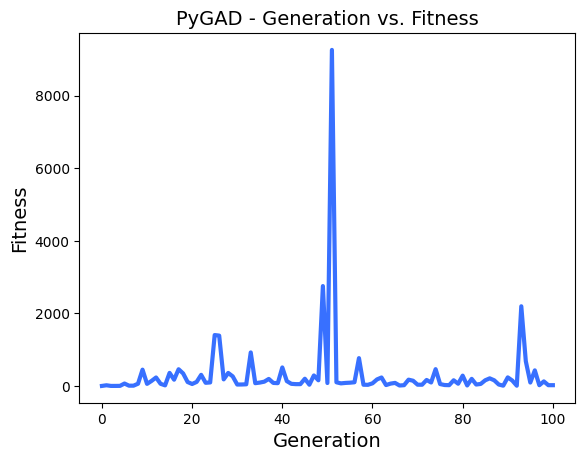

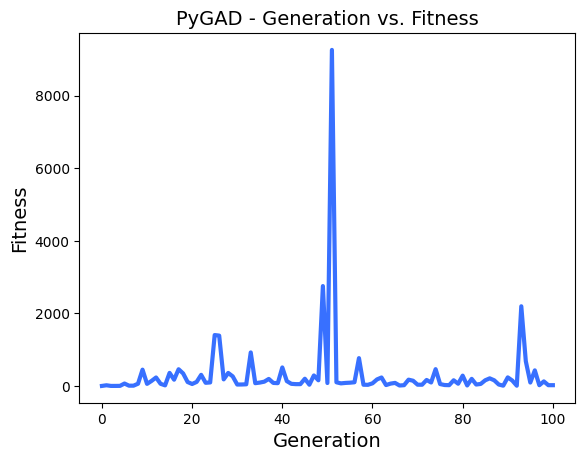

In [13]:
ga_instance.plot_fitness()

In [14]:
# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

Parameters of the best solution : [ 1.53663986  1.40424001 -1.43125922 -5.73148797  6.37146662  1.31703204
 -3.84927438  1.8375884  -5.45510482  0.48526148  2.63786617 -1.70652081
  2.66360661  2.57052571]
Fitness value of the best solution = 23.368170262814967
Index of the best solution : 1


### Test for a space value of 2

In [27]:
function_inputs = space # Function inputs.
desired_output = 2 # Function output.
def fitness_func(solution, solution_idx):
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / (numpy.abs(output - desired_output) + 0.000001)
    return fitness

num_generations = 100 # Number of generations.
num_parents_mating = 10 # Number of solutions to be selected as parents in the mating pool.

sol_per_pop = 20 # Number of solutions in the population.
num_genes = len(function_inputs)

last_fitness = 0
def on_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness))
    last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       fitness_func=fitness_func,
                       on_generation=on_generation)

In [28]:
# Running the GA to optimize the parameters of the function.
ga_instance.run()

Generation = 1
Fitness    = 1.8244914128620404
Change     = 1.8244914128620404
Generation = 2
Fitness    = 7.707260418738978
Change     = 5.882769005876938
Generation = 3
Fitness    = 2.9806239656703526
Change     = -4.726636453068625
Generation = 4
Fitness    = 64.91003252158755
Change     = 61.9294085559172
Generation = 5
Fitness    = 20.853980980790045
Change     = -44.05605154079751
Generation = 6
Fitness    = 1.9252541339562474
Change     = -18.928726846833797
Generation = 7
Fitness    = 7.822748700458811
Change     = 5.897494566502563
Generation = 8
Fitness    = 87.53089606015246
Change     = 79.70814735969364
Generation = 9
Fitness    = 17.530610086667348
Change     = -70.0002859734851
Generation = 10
Fitness    = 108.96868554986067
Change     = 91.43807546319331
Generation = 11
Fitness    = 22.610640266575246
Change     = -86.35804528328542
Generation = 12
Fitness    = 390809.4220889445
Change     = 390786.81144867797
Generation = 13
Fitness    = 8.900554619177687
Change     = 

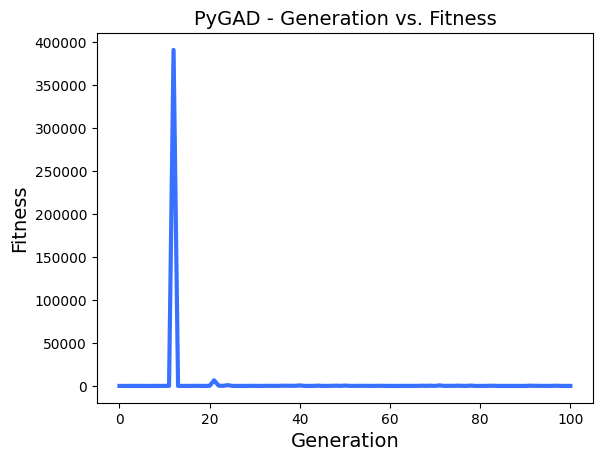

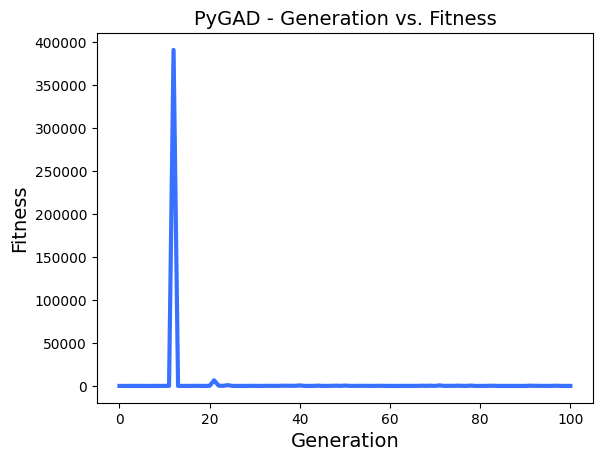

In [29]:
ga_instance.plot_fitness()

In [30]:
# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

Parameters of the best solution : [ 2.40019005 -1.75921516  1.2037222   0.83501054 -4.97525569  2.06073455
 -0.05784768 -2.8094483  -3.26979818 -0.80034817 -2.81148296  2.98376073
 -1.15224209  0.99256038]
Fitness value of the best solution = 18.85050119682853
Index of the best solution : 11


In [31]:
numpy.sum(solution*function_inputs)

1.946952012625158

### Test for Space Value of 3

Generation = 1
Fitness    = 35.69575605075187
Change     = 35.69575605075187
Generation = 2
Fitness    = 35.69575605075187
Change     = 0.0
Generation = 3
Fitness    = 149.8050521213011
Change     = 114.10929607054922
Generation = 4
Fitness    = 35.69575605075187
Change     = -114.10929607054922
Generation = 5
Fitness    = 35.69575605075187
Change     = 0.0
Generation = 6
Fitness    = 35.69575605075187
Change     = 0.0
Generation = 7
Fitness    = 35.69575605075187
Change     = 0.0
Generation = 8
Fitness    = 515.7577109766885
Change     = 480.0619549259366
Generation = 9
Fitness    = 44.33221011956871
Change     = -471.4255008571198
Generation = 10
Fitness    = 35.69575605075187
Change     = -8.636454068816839
Generation = 11
Fitness    = 47.66972621792334
Change     = 11.973970167171473
Generation = 12
Fitness    = 35.88228504947014
Change     = -11.7874411684532
Generation = 13
Fitness    = 578.5849272848834
Change     = 542.7026422354132
Generation = 14
Fitness    = 371.974761516167

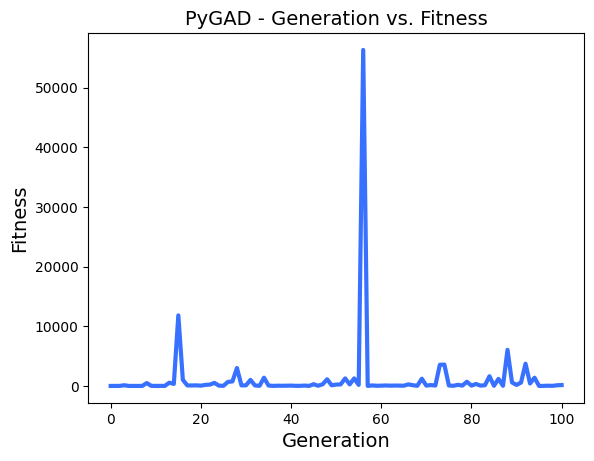

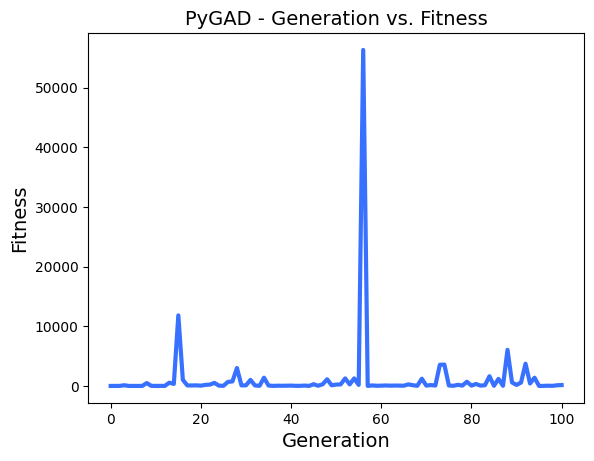

In [32]:
function_inputs = space # Function inputs.
desired_output = 3 # Function output.
def fitness_func(solution, solution_idx):
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / (numpy.abs(output - desired_output) + 0.000001)
    return fitness

num_generations = 100 # Number of generations.
num_parents_mating = 10 # Number of solutions to be selected as parents in the mating pool.

sol_per_pop = 20 # Number of solutions in the population.
num_genes = len(function_inputs)

last_fitness = 0
def on_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness))
    last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       fitness_func=fitness_func,
                       on_generation=on_generation)
# Running the GA to optimize the parameters of the function.
ga_instance.run()
ga_instance.plot_fitness()

In [33]:
# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

Parameters of the best solution : [ 2.1882627  -2.57737638  2.23533681 -3.51869298  3.79455892  0.8033445
 -1.6195517  -0.43844122 -0.47723957 -1.75639529  0.16181622 -0.44760122
  0.82642342  2.83589846]
Fitness value of the best solution = 176.60258808363886
Index of the best solution : 11


In [34]:
numpy.sum(solution*function_inputs)

2.9943385688269846

### Test for Space Value of 4

Generation = 1
Fitness    = 6.445456465618882
Change     = 6.445456465618882
Generation = 2
Fitness    = 2.310510736761969
Change     = -4.134945728856913
Generation = 3
Fitness    = 2.4619630507598607
Change     = 0.1514523139978916
Generation = 4
Fitness    = 5.988960069823104
Change     = 3.5269970190632436
Generation = 5
Fitness    = 10.579151037357573
Change     = 4.590190967534468
Generation = 6
Fitness    = 26.632152531475835
Change     = 16.053001494118263
Generation = 7
Fitness    = 121.61224251303135
Change     = 94.98008998155551
Generation = 8
Fitness    = 45.07436147006588
Change     = -76.53788104296547
Generation = 9
Fitness    = 44.53565802752583
Change     = -0.5387034425400543
Generation = 10
Fitness    = 18.395790465602047
Change     = -26.13986756192378
Generation = 11
Fitness    = 189.51218361943438
Change     = 171.11639315383235
Generation = 12
Fitness    = 261.95643406127226
Change     = 72.44425044183788
Generation = 13
Fitness    = 119.24089429220345
Change   

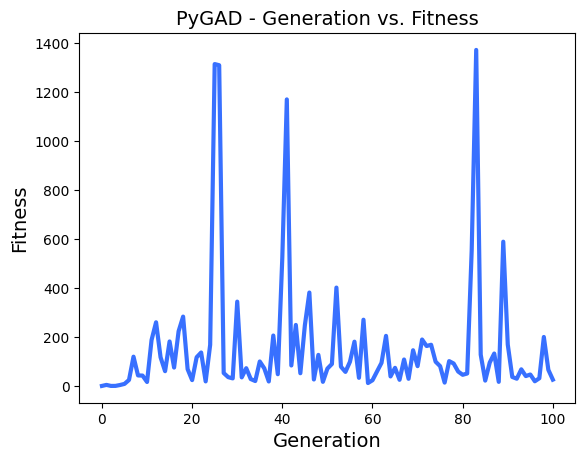

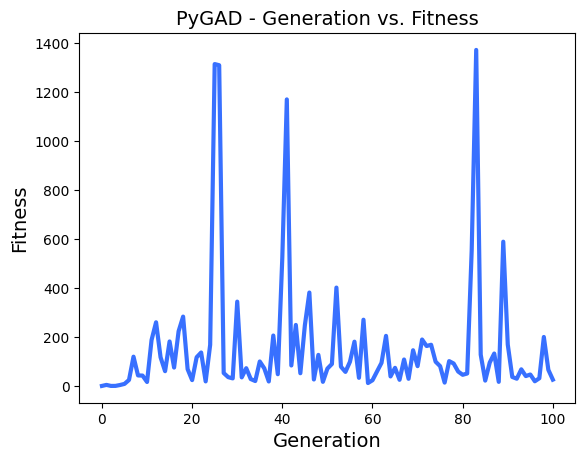

In [39]:
function_inputs = space # Function inputs.
desired_output = 4 # Function output.
def fitness_func(solution, solution_idx):
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / (numpy.abs(output - desired_output) + 0.000001)
    return fitness

num_generations = 100 # Number of generations.
num_parents_mating = 10 # Number of solutions to be selected as parents in the mating pool.

sol_per_pop = 20 # Number of solutions in the population.
num_genes = len(function_inputs)

last_fitness = 0
def on_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness))
    last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       fitness_func=fitness_func,
                       on_generation=on_generation)
# Running the GA to optimize the parameters of the function.
ga_instance.run()
ga_instance.plot_fitness()

In [40]:
# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

Parameters of the best solution : [ 0.05865434  2.87156332  0.56160552  0.64568495  4.07843656  3.16160311
  0.97358543 -1.5369143   2.89841834  1.63343223  2.04856555  0.73849765
 -0.58682289  0.90045009]
Fitness value of the best solution = 27.88224219692936
Index of the best solution : 18


In [41]:
numpy.sum(solution*function_inputs)

4.03586412135348

### Test for space Value of 5

Generation = 1
Fitness    = 51.4115444750534
Change     = 51.4115444750534
Generation = 2
Fitness    = 21.143472174568053
Change     = -30.268072300485343
Generation = 3
Fitness    = 10.00887014136914
Change     = -11.134602033198913
Generation = 4
Fitness    = 437.99032977865085
Change     = 427.9814596372817
Generation = 5
Fitness    = 52.830445479413335
Change     = -385.1598842992375
Generation = 6
Fitness    = 23.89339529390963
Change     = -28.937050185503704
Generation = 7
Fitness    = 101.71178512686305
Change     = 77.81838983295341
Generation = 8
Fitness    = 76.53306325338049
Change     = -25.17872187348256
Generation = 9
Fitness    = 238.79896226013182
Change     = 162.26589900675134
Generation = 10
Fitness    = 76.2800617172729
Change     = -162.51890054285892
Generation = 11
Fitness    = 21.591538964802268
Change     = -54.68852275247063
Generation = 12
Fitness    = 25.646699663837293
Change     = 4.055160699035024
Generation = 13
Fitness    = 359.1006082374097
Change    

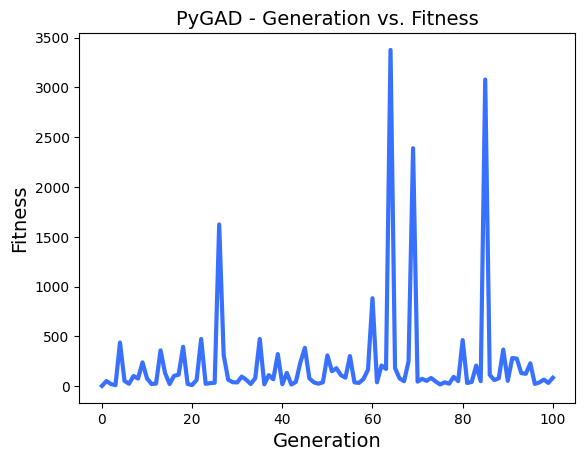

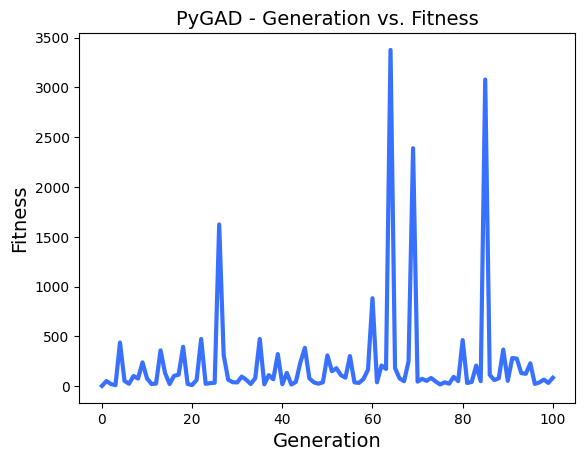

In [42]:
function_inputs = space # Function inputs.
desired_output = 5 # Function output.
def fitness_func(solution, solution_idx):
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / (numpy.abs(output - desired_output) + 0.000001)
    return fitness

num_generations = 100 # Number of generations.
num_parents_mating = 10 # Number of solutions to be selected as parents in the mating pool.

sol_per_pop = 20 # Number of solutions in the population.
num_genes = len(function_inputs)

last_fitness = 0
def on_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness))
    last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       fitness_func=fitness_func,
                       on_generation=on_generation)
# Running the GA to optimize the parameters of the function.
ga_instance.run()
ga_instance.plot_fitness()

In [43]:
# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

Parameters of the best solution : [-1.20622744  1.69493433  2.0443654  -1.31309763 -4.05993581  2.26128278
  1.66353414  6.74434628 -0.97931319  1.83419785  3.84812994  2.67341235
  2.85450511 -1.94011017]
Fitness value of the best solution = 84.31109217267813
Index of the best solution : 3


In [44]:
numpy.sum(solution*function_inputs)

5.01185983555829